## Shallow CNN models evaluation

Input files: training history of each model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sources import util

%matplotlib inline

list of shallow CNN models to analyze

(model map: 8 layers of conv layer and 2 layers of full-connected layer; number indicates number of filter/nodes; 0 means omitted layer)
- base: conv layer [32, 32, 64, 64, 128, 128, 256, 256], dense layer [100, 100]
- var1: conv layer [23, 24, 37, 0, 125, 0, 254, 0], dense layer [100, 100]
- var2: conv layer [32, 32, 64, 64, 128, 128, 256, 256], dense layer [38, 44]
- var3: conv layer [23, 24, 37, 0, 125, 0, 254, 0], dense layer [38, 44]

In [2]:
# shallow CNN models
shallows = ['ShallowNet_Base', 'ShallowNet_Var1', 'ShallowNet_Var2', 'ShallowNet_Var3']

### Training Process

The training history of each model was stored in the train_history csv file

Here, we are comparing the changing trend of several metrics of four shallow models during the training process.

In [3]:
# load training histories
shallow_history = {}
for name in shallows:
    file_name = name+'-train_history.csv'
    file_path = os.path.join('Saved_files', 'history', file_name)
    df = pd.read_csv(file_path, index_col=0)
    shallow_history[name] = df
    print(f'{name} file loaded')

ShallowNet_Base file loaded
ShallowNet_Var1 file loaded
ShallowNet_Var2 file loaded
ShallowNet_Var3 file loaded


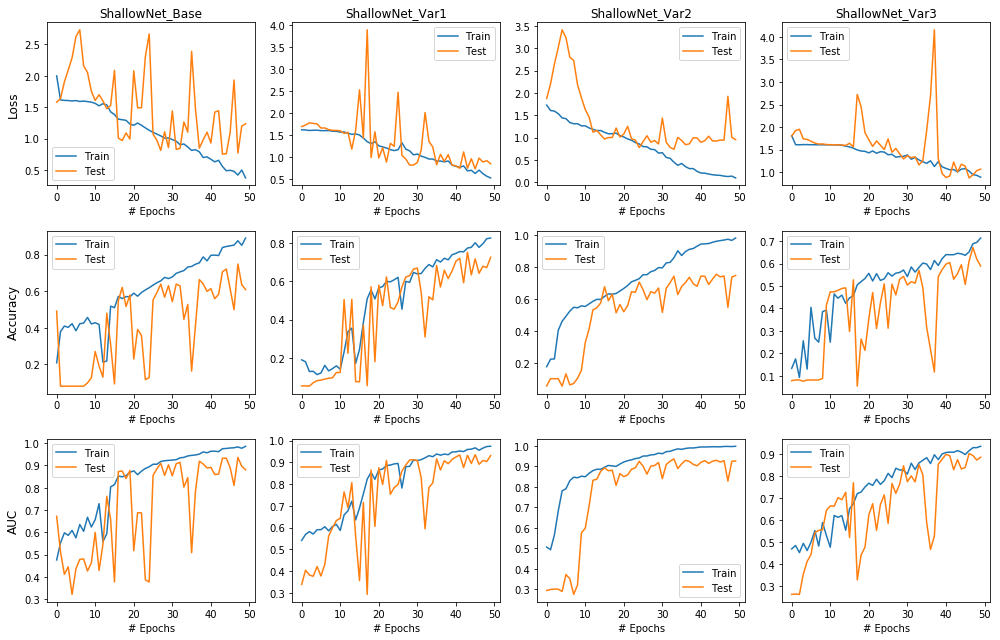

In [4]:
fig, axe = plt.subplots(3,4,figsize=(14,9))
#fig.suptitle('Performance of models', fontsize=16)
cols = [name for name in shallows]
rows = ['Loss', 'Accuracy', 'AUC']
for ax, col in zip(axe[0], cols):
    ax.set_title(col, fontsize=12)
for ax, row in zip(axe[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=12)
for i in range(4):
    df = shallow_history[shallows[i]]
    data_cols = [['loss', 'val_loss'], ['accuracy', 'val_accuracy'], ['auc', 'val_auc']]
    for j in range(3):
        data = np.array(df[data_cols[j]])
        axe[j, i].plot(data)
        axe[j, i].legend(['Train', 'Test'])
        axe[j, i].set_xlabel('# Epochs')
fig.tight_layout()
fig.savefig('report_images/train_history.png', dpi=200)

All of our shallow CNN models performed similarly and reached over 0.9 AUC scores.

### Model Comparisons

- the changing trend of AUC scores in training process

The AUC scores in each epoch of all four models are compared.

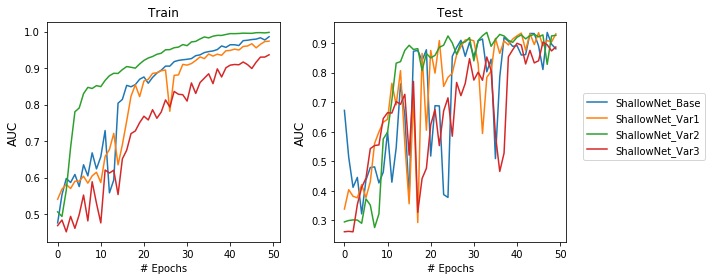

In [5]:
fig, axe = plt.subplots(1,2,figsize=(10,4))
cols = ['Train', 'Test']
for ax, col in zip(axe, cols):
    ax.set_title(col, fontsize=12)
    
for i in range(4):
    df = shallow_history[shallows[i]]
    axe[0].plot(np.array(df['auc']))
    axe[1].plot(np.array(df['val_auc']))
for ax in axe:
    ax.set_xlabel('# Epochs')
    ax.set_ylabel('AUC', rotation=90, fontsize=12)
axe[1].legend(shallows, bbox_to_anchor=(1.05, 0.7))

fig.tight_layout()
fig.savefig('report_images/auc_comparison.png', dpi=200)

AUC score on both training set and test set reached 0.9 using all four models.

- the final trained model

load saved models

In [6]:
saved_models = {name:util.load_saved_model(name+'-model.h5') for name in shallows}

ShallowNet_Base-model model loaded
ShallowNet_Var1-model model loaded
ShallowNet_Var2-model model loaded
ShallowNet_Var3-model model loaded


prepare info on number of parameters

In [7]:
para_num = []
for name in shallows:
    tmpstring = []
    saved_models[name].summary(print_fn=lambda x: tmpstring.append(x))
    para = tmpstring[-4]
    num = int(para.split(':')[1].strip().replace(',', ''))
    para_num.append(num)

prepare info of AUC on training set and test set

In [8]:
auc = []
val_auc = []
for model in shallows:
    df = shallow_history[model]
    auc.append(df.loc[49, 'auc'])
    val_auc.append(df.loc[49, 'val_auc'])

prepare info of training time

In [9]:
time_file = os.path.join('Saved_files', 'training_times.csv')
df_time = pd.read_csv(time_file)
train_time = np.array(df_time['training time'])/50

plot all four metrics

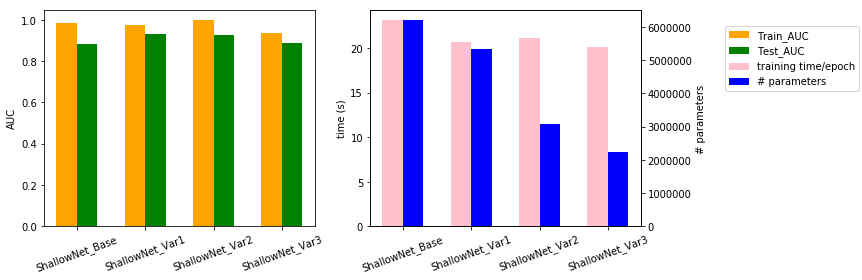

In [10]:
x = np.arange(len(shallows))  # the label locations
width = 0.3  # the width of the bars

fig, axe = plt.subplots(1,2,figsize=(10,4))

# axe[0] - AUC
axe[0].bar(x - width/2, auc, width, label='Train_AUC', color='orange')
axe[0].bar(x + width/2, val_auc, width, label='Test_AUC', color='green')

axe[0].set_ylabel('AUC')
axe[0].set_xticks(x)
axe[0].set_xticklabels(shallows, rotation=20)

# axe[1] - training time and # param
tax = axe[1].twinx()
axe[1].bar(x - width/2, train_time, width, label='training time/epoch', color='pink')
tax.bar(x + width/2, para_num, width, label='# parameters', color='blue')

axe[1].set_ylabel('time (s)')
tax.set_ylabel('# parameters')
axe[1].set_xticks(x)
axe[1].set_xticklabels(shallows, rotation=20)

lgd = fig.legend(bbox_to_anchor=(1.2, 0.9))
fig.tight_layout()
fig.savefig('report_images/metrics_comparison', dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')

The variant models perform similarly to the base model, while having shorter training time and much fewer trainable parameters.